In [69]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.stats import linregress
import scipy.stats as st

In [70]:

# Load in files
rent_index_load = Path("data-files/Zillow_Observed_Rent_Index_(ZORI).csv")
home_value_index_load = Path("data-files/Zillow_Home_Value_Index_(ZHVI).csv")
home_value_forecast_load = Path("data-files/Zillow_Home_Value_Forecast_(ZHVF).csv")
percent_home_sold_above_list_load = Path("data-files/Percent_homes_sold_above_list.csv")
median_sale_to_list_ratio_load = Path("data-files/Median_Sale-to-List_Ratio.csv")
madian_sale_price_load = Path("data-files/Median_Sale_Price.csv")
median_days_to_close_load = Path("data-files/Median_days_to_close.csv")

# Store files as Data Frame
rent_index = pd.read_csv(rent_index_load)
home_value_index = pd.read_csv(home_value_index_load)
home_value_forecast = pd.read_csv(home_value_forecast_load)
percent_home_sold_above_list = pd.read_csv(percent_home_sold_above_list_load)
median_sale_to_list_ratio = pd.read_csv(median_sale_to_list_ratio_load)
madian_sale_price = pd.read_csv(madian_sale_price_load)
median_days_to_close = pd.read_csv(median_days_to_close_load)

In [71]:
# Take a look at the data
rent_index.head()

RegionID  SizeRank       RegionName RegionType StateName    1/31/2015  \
0    102001         0    United States    country       USA  1280.633863   
1    394913         1     New York, NY        msa        NY  2426.843124   
2    753899         2  Los Angeles, CA        msa        CA  1897.597785   
3    394463         3      Chicago, IL        msa        IL  1417.325728   
4    394514         4       Dallas, TX        msa        TX  1139.808665   

     2/28/2015    3/31/2015    4/30/2015    5/31/2015  ...   12/31/2022  \
0  1287.501924  1296.645905  1306.721774  1316.751242  ...  1975.835739   
1  2443.214185  2461.569551  2484.335192  2500.447307  ...  3192.662155   
2  1909.296480  1924.702226  1939.356022  1954.717452  ...  2924.394108   
3  1424.776246  1435.912190  1445.772642  1456.722898  ...  1860.947800   
4  1144.828522  1152.963226  1163.690479  1174.252609  ...  1795.720424   

     1/31/2023    2/28/2023    3/31/2023    4/30/2023    5/31/2023  \
0  1977.938133  1983.983289  1992.489296  2003.280119  2015.846679   
1  3186.090274  3201.305375  3227.659771  3264.971399  3305.837389   
2  2920.801579  2928.269343  2936.661995  2951.164632  2958.004259   
3  1868.049689  1880.888532  1893.637877  1909.273200  1932.058153   
4  1793.799306  1796.900598  1802.831095  1806.282541  1813.190759   

     6/30/2023    7/31/2023    8/31/2023    9/30/2023  
0  2026.886830  2037.184481  2043.719504  2047.095633  
1  3343.975859  3369.088119  3378.231065  3376.205700  
2  2968.798884  2982.964790  2995.886668  3001.423728  
3  1952.481379  1965.321340  1972.630211  1971.321022  
4  1821.711844  1830.681080  1832.988133  1829.204295  

[5 rows x 110 columns]

In [72]:
#Clean the data 
rent_index_cleaned = rent_index.dropna()
home_value_index_cleaned = home_value_index.dropna()
home_value_forecast_cleaned = home_value_forecast.dropna()
percent_home_sold_above_list_cleaned = percent_home_sold_above_list.dropna()
median_sale_to_list_ratio_cleaned = median_sale_to_list_ratio.dropna()
madian_sale_price_cleaned = madian_sale_price.dropna()
median_days_to_close_cleaned = median_days_to_close.dropna()

In [73]:
rent_index_cleaned.head()

RegionID  SizeRank       RegionName RegionType StateName    1/31/2015  \
0    102001         0    United States    country       USA  1280.633863   
2    753899         2  Los Angeles, CA        msa        CA  1897.597785   
3    394463         3      Chicago, IL        msa        IL  1417.325728   
4    394514         4       Dallas, TX        msa        TX  1139.808665   
5    394692         5      Houston, TX        msa        TX  1251.772294   

     2/28/2015    3/31/2015    4/30/2015    5/31/2015  ...   12/31/2022  \
0  1287.501924  1296.645905  1306.721774  1316.751242  ...  1975.835739   
2  1909.296480  1924.702226  1939.356022  1954.717452  ...  2924.394108   
3  1424.776246  1435.912190  1445.772642  1456.722898  ...  1860.947800   
4  1144.828522  1152.963226  1163.690479  1174.252609  ...  1795.720424   
5  1256.316282  1263.033545  1275.256750  1285.117260  ...  1626.560154   

     1/31/2023    2/28/2023    3/31/2023    4/30/2023    5/31/2023  \
0  1977.938133  1983.983289  1992.489296  2003.280119  2015.846679   
2  2920.801579  2928.269343  2936.661995  2951.164632  2958.004259   
3  1868.049689  1880.888532  1893.637877  1909.273200  1932.058153   
4  1793.799306  1796.900598  1802.831095  1806.282541  1813.190759   
5  1634.287538  1641.741649  1651.503734  1655.765806  1664.868338   

     6/30/2023    7/31/2023    8/31/2023    9/30/2023  
0  2026.886830  2037.184481  2043.719504  2047.095633  
2  2968.798884  2982.964790  2995.886668  3001.423728  
3  1952.481379  1965.321340  1972.630211  1971.321022  
4  1821.711844  1830.681080  1832.988133  1829.204295  
5  1674.589684  1681.546178  1682.683184  1679.823981  

[5 rows x 110 columns]

In [74]:
home_value_index_cleaned.head()

RegionID  SizeRank       RegionName RegionType StateName    1/31/2000  \
0    102001         0    United States    country       USA  121428.3483   
1    394913         1     New York, NY        msa        NY  216218.9851   
2    753899         2  Los Angeles, CA        msa        CA  222303.0449   
3    394463         3      Chicago, IL        msa        IL  152289.7014   
5    394692         5      Houston, TX        msa        TX  121045.1872   

     2/29/2000    3/31/2000    4/30/2000    5/31/2000  ...   12/31/2022  \
0  121641.9797  121906.9141  122475.1464  123129.1135  ...  341524.6868   
1  217137.7938  218065.1124  219944.2185  221890.0980  ...  607957.9145   
2  223130.2942  224232.1825  226424.5701  228822.3547  ...  883096.4822   
3  152430.6773  152699.1683  153367.1074  154170.5578  ...  292513.6705   
5  121067.7342  120983.2197  121033.7375  121080.3385  ...  305696.3405   

     1/31/2023    2/28/2023    3/31/2023    4/30/2023    5/31/2023  \
0  340331.9654  339460.2907  339398.6809  340364.8719  341993.7347   
1  607138.3756  605781.0393  606096.5352  608105.1209  612136.7860   
2  874754.1695  863791.2804  853971.7250  851581.7060  855385.2459   
3  291906.8686  291753.7845  292397.0654  294085.1403  296271.6008   
5  303930.5894  302254.0820  301105.3116  300656.8832  300811.7669   

     6/30/2023    7/31/2023    8/31/2023    9/30/2023  
0  343935.0266  345686.2161  347311.2451  348538.9619  
1  616308.0170  619911.4944  623211.9849  625939.7209  
2  863224.2741  874493.2711  888127.7853  901894.4880  
3  298827.0324  301362.8932  303811.3583  305636.2748  
5  301616.7104  302539.6583  303414.9210  303771.6259  

[5 rows x 290 columns]

In [75]:
percent_home_sold_above_list_cleaned.head()

RegionID  SizeRank       RegionName RegionType StateName  1/31/2018  \
0    102001         0    United States    country       USA   0.202254   
1    394913         1     New York, NY        msa        NY   0.202104   
2    753899         2  Los Angeles, CA        msa        CA   0.357563   
3    394463         3      Chicago, IL        msa        IL   0.137890   
6    395209         6   Washington, DC        msa        VA   0.206920   

   2/28/2018  3/31/2018  4/30/2018  5/31/2018  ...  11/30/2022  12/31/2022  \
0   0.225684   0.257072   0.278533   0.293255  ...    0.274239    0.243315   
1   0.190585   0.199001   0.211545   0.218635  ...    0.411416    0.382979   
2   0.401729   0.444095   0.457139   0.460404  ...    0.345244    0.311723   
3   0.149428   0.181134   0.200747   0.218943  ...    0.281586    0.249403   
6   0.283699   0.285949   0.362828   0.348870  ...    0.305093    0.266297   

   1/31/2023  2/28/2023  3/31/2023  4/30/2023  5/31/2023  6/30/2023  \
0   0.218704   0.248517   0.303111   0.354492   0.393911   0.416005   
1   0.336533   0.323059   0.377137   0.444359   0.502006   0.561925   
2   0.285525   0.353517   0.417382   0.497789   0.547798   0.577341   
3   0.242491   0.282411   0.370546   0.444913   0.492097   0.523096   
6   0.257229   0.365861   0.463453   0.530172   0.570647   0.558637   

   7/31/2023  8/31/2023  
0   0.401907   0.377169  
1   0.582363   0.568731  
2   0.590858   0.579426  
3   0.509259   0.462631  
6   0.533967   0.498898  

[5 rows x 73 columns]

In [76]:
median_sale_to_list_ratio_cleaned.head()

RegionID  SizeRank       RegionName RegionType StateName  1/31/2018  \
0    102001         0    United States    country       USA   0.982759   
1    394913         1     New York, NY        msa        NY   0.978096   
2    753899         2  Los Angeles, CA        msa        CA   0.997340   
3    394463         3      Chicago, IL        msa        IL   0.971429   
4    394514         4       Dallas, TX        msa        TX   0.987408   

   2/28/2018  3/31/2018  4/30/2018  5/31/2018  ...  11/30/2022  12/31/2022  \
0   0.984615   0.988235   0.990948   0.993166  ...    0.991435    0.987124   
1   0.977208   0.978929   0.979548   0.980501  ...    1.000000    1.000000   
2   1.000000   1.000000   1.000000   1.000000  ...    0.993324    0.990198   
3   0.973270   0.977199   0.979955   0.981659  ...    0.987150    0.983661   
4   0.991952   0.995918   1.000000   1.000000  ...    0.987467    0.984641   

   1/31/2023  2/28/2023  3/31/2023  4/30/2023  5/31/2023  6/30/2023  \
0   0.984566   0.988296   0.997877        1.0   1.000000   1.000000   
1   0.990198   0.989122   0.999500        1.0   1.000001   1.009374   
2   0.987180   0.993432   1.000000        1.0   1.002639   1.007890   
3   0.981997   0.986385   1.000000        1.0   1.000000   1.000286   
4   0.981818   0.986111   0.996117        1.0   1.000000   1.000000   

   7/31/2023  8/31/2023  
0   1.000000   1.000000  
1   1.016198   1.011414  
2   1.008000   1.007922  
3   1.000185   1.000000  
4   1.000000   0.996784  

[5 rows x 73 columns]

In [77]:
madian_sale_price_cleaned.head()

RegionID  SizeRank       RegionName RegionType StateName  2/29/2008  \
0    102001         0    United States    country       USA   180000.0   
2    753899         2  Los Angeles, CA        msa        CA   500000.0   
3    394463         3      Chicago, IL        msa        IL   227500.0   
4    394514         4       Dallas, TX        msa        TX   137000.0   
5    394692         5      Houston, TX        msa        TX   143500.0   

   3/31/2008  4/30/2008  5/31/2008  6/30/2008  ...  11/30/2022  12/31/2022  \
0   185000.0   186000.0   189000.0   195000.0  ...    325000.0    320000.0   
2   495000.0   500000.0   490000.0   481000.0  ...    830000.0    810000.0   
3   235000.0   230000.0   235000.0   245000.0  ...    275000.0    270000.0   
4   146680.0   144000.0   149900.0   155000.0  ...    375000.0    360000.0   
5   143250.0   143900.0   149000.0   155000.0  ...    310000.0    309000.0   

   1/31/2023  2/28/2023  3/31/2023  4/30/2023  5/31/2023  6/30/2023  \
0   320000.0   329755.0   340000.0   350000.0   360000.0   366000.0   
2   815000.0   825000.0   841000.0   850000.0   868000.0   900000.0   
3   265000.0   272000.0   290000.0   300000.0   310000.0   326050.0   
4   355000.0   372000.0   374700.0   385000.0   395000.0   405000.0   
5   299900.0   307000.0   315000.0   320000.0   330000.0   335000.0   

   7/31/2023  8/31/2023  
0   362000.0     360000  
2   895000.0     900000  
3   319700.0     320000  
4   400000.0     395000  
5   335000.0     330000  

[5 rows x 192 columns]

In [78]:
median_days_to_close_cleaned.head()

RegionID  SizeRank       RegionName RegionType StateName  1/31/2018  \
0    102001         0    United States    country       USA       35.0   
1    394913         1     New York, NY        msa        NY       63.0   
2    753899         2  Los Angeles, CA        msa        CA       35.0   
3    394463         3      Chicago, IL        msa        IL       42.0   
5    394692         5      Houston, TX        msa        TX       31.0   

   2/28/2018  3/31/2018  4/30/2018  5/31/2018  ...  11/30/2022  12/31/2022  \
0       31.0       31.0       32.0       34.0  ...        32.0        31.0   
1       56.0       49.0       48.0       49.0  ...        52.0        51.0   
2       29.0       30.0       30.0       31.0  ...        28.0        29.0   
3       39.0       38.0       40.0       42.0  ...        36.0        35.0   
5       29.0       30.0       31.0       32.0  ...        28.0        28.0   

   1/31/2023  2/28/2023  3/31/2023  4/30/2023  5/31/2023  6/30/2023  \
0       33.0       30.0       30.0       31.0       31.0       32.0   
1       57.0       53.0       48.0       50.0       52.0       54.0   
2       30.0       27.0       28.0       28.0       28.0       29.0   
3       37.0       33.0       35.0       36.0       36.0       37.0   
5       29.0       28.0       28.0       29.0       29.0       29.0   

   7/31/2023  8/31/2023  
0       31.0         31  
1       53.0         53  
2       28.0         28  
3       36.0         35  
5       29.0         28  

[5 rows x 73 columns]

In [79]:
#Drop RegionID, Size, RegionName & Type
median_days_to_close_cleaned1 = median_days_to_close_cleaned.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType'], axis=1)

In [80]:
#Group the states
median_days_to_close_grouped_state = median_days_to_close_cleaned1.groupby('StateName').median()

In [81]:
median_days_to_close_grouped_state.head()

1/31/2018  2/28/2018  3/31/2018  4/30/2018  5/31/2018  6/30/2018  \
StateName                                                                     
AL              36.0       30.0       32.0       32.0       33.0       33.0   
AR              33.0       31.0       30.5       28.0       29.5       33.5   
AZ              37.5       34.0       34.0       33.0       35.0       36.0   
CA              35.0       29.0       30.0       30.0       31.0       32.0   
CO              36.0       31.0       32.0       32.0       33.0       34.0   

           7/31/2018  8/31/2018  9/30/2018  10/31/2018  ...  11/30/2022  \
StateName                                               ...               
AL              33.0       31.0       32.0        32.0  ...        29.0   
AR              33.0       33.5       34.0        31.5  ...        32.0   
AZ              33.0       33.5       34.0        34.5  ...        30.0   
CA              32.0       30.5       30.0        31.0  ...        28.0   
CO              33.0       33.0       32.0        35.0  ...        29.0   

           12/31/2022  1/31/2023  2/28/2023  3/31/2023  4/30/2023  5/31/2023  \
StateName                                                                      
AL               30.0       31.0       28.0       29.0       30.0       32.0   
AR               30.0       31.0       31.0       30.5       30.5       30.5   
AZ               29.0       30.5       29.0       30.5       30.5       29.0   
CA               28.0       30.0       27.0       28.0       28.0       28.5   
CO               30.0       30.0       30.0       28.0       28.0       31.0   

           6/30/2023  7/31/2023  8/31/2023  
StateName                                   
AL              34.0       30.0       30.0  
AR              31.0       32.0       31.0  
AZ              30.0       31.5       30.0  
CA              28.5       28.5       28.0  
CO              30.0       30.0       28.0  

[5 rows x 68 columns]

In [82]:
#Find average closing time of each state
average_closing_time_state = median_days_to_close_grouped_state.mean(axis=1)

In [83]:
#show average
average_closing_time_state.head()

StateName
AL    32.764706
AR    33.102941
AZ    33.588235
CA    30.867647
CO    31.808824
dtype: float64

In [84]:
#sort by amount of time
average_closing_time_state_sorted = average_closing_time_state.sort_values(ascending=False)

In [85]:
average_closing_time_state_sorted.head()

StateName
NY    54.941176
HI    46.750000
MA    44.352941
CT    44.345588
NJ    42.514706
dtype: float64

In [86]:
#Panda showing label for values
closing_data = {'StateName': average_closing_time_state_sorted.index, 'Avg_Days_To_Close': average_closing_time_state_sorted.values}
close_time_by_state = pd.DataFrame(closing_data)

In [87]:
close_time_by_state

StateName  Avg_Days_To_Close
0         NY          54.941176
1         HI          46.750000
2         MA          44.352941
3         CT          44.345588
4         NJ          42.514706
5         SD          41.808824
6         RI          41.073529
7         PA          40.000000
8         DE          38.801471
9         IA          38.536765
10        ME          37.867647
11        IL          37.852941
12        SC          37.573529
13        MT          37.367647
14        NM          36.808824
15        NC          36.573529
16        KY          36.110294
17        OR          35.933824
18        TN          35.823529
19        MS          35.514706
20        MD          35.470588
21        FL          34.977941
22        LA          34.926471
23        NV          34.852941
24        MO          34.647059
25        NE          34.250000
26        WA          34.029412
27        MN          33.985294
28        OH          33.889706
29        WY          33.882353
30        AZ          33.588235
31        WV          33.573529
32       USA          33.558824
33        AR          33.102941
34        MI          33.036765
35        IN          32.970588
36        OK          32.948529
37        AL          32.764706
38        VA          32.654412
39        CO          31.808824
40        TX          31.411765
41        UT          31.176471
42        GA          31.154412
43        CA          30.867647
44        WI          26.808824

In [88]:
home_value_index_cleaned1 = home_value_index_cleaned.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType'], axis=1)
home_value_index_grouped_state = home_value_index_cleaned1.groupby('StateName').median()

In [89]:
home_value_index_grouped_state.head()

1/31/2000      2/29/2000     3/31/2000      4/30/2000  \
StateName                                                             
AL         111088.10120  111352.002500  111470.33840  111633.114800   
AR          73194.69767   72940.418370   73324.57843   73869.879130   
AZ          94440.92320   94490.868115   94720.46349   95139.054725   
CA         207673.96910  208214.658500  209137.03260  210114.455900   
CO         164966.99445  165198.518650  165063.61990  165086.802000   

              5/31/2000     6/30/2000      7/31/2000     8/31/2000  \
StateName                                                            
AL         112080.50670  112626.18810  112909.361500  113200.11390   
AR          74781.85051   75203.22354   75736.316460   76099.11151   
AZ          95651.79721   96144.07905   96647.285575   97225.84251   
CA         211268.80290  213527.33030  217492.621500  222033.52890   
CO         165204.29245  165853.04730  166840.260300  168033.46390   

              9/30/2000     10/31/2000  ...   12/31/2022     1/31/2023  \
StateName                               ...                              
AL         113540.81050  113841.421200  ...  206726.5582  206909.97190   
AR          76660.71563   76717.793770  ...  145473.1392  144727.70860   
AZ          97907.74395   98610.261325  ...  365072.1670  360837.79865   
CA         226211.23170  230077.430500  ...  772121.2954  767933.92150   
CO         169361.00690  170801.584600  ...  475623.3210  472468.93015   

              2/28/2023     3/31/2023    4/30/2023    5/31/2023     6/30/2023  \
StateName                                                                       
AL         207374.13440  208394.71340  209557.6288  210917.5246  211703.68600   
AR         144236.17620  144350.20350  145253.3189  146713.8166  147569.82950   
AZ         357668.12510  355780.97575  355581.6513  356717.9988  358075.10610   
CA         765086.23220  764789.46890  767093.9505  771536.8284  776282.67580   
CO         469796.44925  467433.73930  465855.1247  465183.7592  465843.76925   

              7/31/2023     8/31/2023     9/30/2023  
StateName                                            
AL         212025.54650  211965.97350  212102.88970  
AR         147531.36040  146623.77430  146134.23890  
AZ         359219.11555  360458.42895  361673.05675  
CA         781228.35760  784894.38970  787111.17430  
CO         467151.85610  468660.60235  469703.05630  

[5 rows x 285 columns]

In [90]:
#show averages 
average_home_value_index = home_value_index_grouped_state.mean(axis=1)

In [91]:
average_home_value_index.head()

StateName
AL    141661.929915
AR    102207.609773
AZ    184032.939936
CA    452904.424881
CO    258598.026358
dtype: float64

In [92]:
average_home_value_index_sorted = average_home_value_index.sort_values(ascending=False)
average_home_value_index_sorted

StateName
HI     503587.379515
CA     452904.424881
MA     321785.331398
WA     292478.854890
RI     269240.980126
CO     258598.026358
MD     258229.738884
DE     256593.758754
UT     254766.713262
NV     254638.676061
VT     240113.140755
CT     238510.480331
OR     236401.058980
NJ     231985.614245
NH     222590.064132
WI     206730.683142
USA    200007.628547
LA     193500.193912
SC     192539.824180
ID     189130.940564
MN     186193.097634
AZ     184032.939936
FL     183210.181064
VA     165532.770293
TX     162828.023538
NE     160876.339331
IA     155999.311428
ME     155248.159569
MO     153969.178031
AL     141661.929915
NC     141277.250073
TN     140498.738724
MI     135440.602807
IN     135291.081186
PA     132909.450089
NY     121225.124518
OH     116486.305077
KS     114065.405129
KY     113195.653507
GA     112110.052617
IL     109015.041180
WV     102256.708006
AR     102207.609773
OK      98962.872663
dtype: float64

In [93]:
#Panda showing label for values
home_value_index_data = {'State Name': average_home_value_index_sorted.index, 'Avg_Home_Index_Value': average_home_value_index_sorted.values}
home_value_by_state = pd.DataFrame(home_value_index_data)

home_value_by_state.head()

State Name  Avg_Home_Index_Value
0         HI         503587.379515
1         CA         452904.424881
2         MA         321785.331398
3         WA         292478.854890
4         RI         269240.980126

In [94]:
percent_home_sold_above_list_cleaned.head()

RegionID  SizeRank       RegionName RegionType StateName  1/31/2018  \
0    102001         0    United States    country       USA   0.202254   
1    394913         1     New York, NY        msa        NY   0.202104   
2    753899         2  Los Angeles, CA        msa        CA   0.357563   
3    394463         3      Chicago, IL        msa        IL   0.137890   
6    395209         6   Washington, DC        msa        VA   0.206920   

   2/28/2018  3/31/2018  4/30/2018  5/31/2018  ...  11/30/2022  12/31/2022  \
0   0.225684   0.257072   0.278533   0.293255  ...    0.274239    0.243315   
1   0.190585   0.199001   0.211545   0.218635  ...    0.411416    0.382979   
2   0.401729   0.444095   0.457139   0.460404  ...    0.345244    0.311723   
3   0.149428   0.181134   0.200747   0.218943  ...    0.281586    0.249403   
6   0.283699   0.285949   0.362828   0.348870  ...    0.305093    0.266297   

   1/31/2023  2/28/2023  3/31/2023  4/30/2023  5/31/2023  6/30/2023  \
0   0.218704   0.248517   0.303111   0.354492   0.393911   0.416005   
1   0.336533   0.323059   0.377137   0.444359   0.502006   0.561925   
2   0.285525   0.353517   0.417382   0.497789   0.547798   0.577341   
3   0.242491   0.282411   0.370546   0.444913   0.492097   0.523096   
6   0.257229   0.365861   0.463453   0.530172   0.570647   0.558637   

   7/31/2023  8/31/2023  
0   0.401907   0.377169  
1   0.582363   0.568731  
2   0.590858   0.579426  
3   0.509259   0.462631  
6   0.533967   0.498898  

[5 rows x 73 columns]

In [95]:
percent_home_sold_above_list1 = percent_home_sold_above_list_cleaned.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType'], axis=1)
percent_home_sold_above_list_cleaned_grouped_state = percent_home_sold_above_list1.groupby('StateName').median()

percent_home_sold_above_list_cleaned_grouped_state.head()

1/31/2018  2/28/2018  3/31/2018  4/30/2018  5/31/2018  6/30/2018  \
StateName                                                                     
AL          0.147059   0.144348   0.108844   0.114865   0.169492   0.159341   
AR          0.089471   0.125884   0.110243   0.159747   0.156556   0.127691   
AZ          0.093067   0.121254   0.154801   0.141400   0.152363   0.139552   
CA          0.298147   0.317073   0.362069   0.375000   0.375000   0.375796   
CO          0.241758   0.322581   0.393035   0.411458   0.425287   0.396887   

           7/31/2018  8/31/2018  9/30/2018  10/31/2018  ...  11/30/2022  \
StateName                                               ...               
AL          0.102941   0.150442   0.099010    0.137931  ...    0.183824   
AR          0.158968   0.136628   0.133401    0.118781  ...    0.257636   
AZ          0.130868   0.109753   0.105690    0.106767  ...    0.110928   
CA          0.339161   0.329480   0.317568    0.284768  ...    0.286550   
CO          0.336449   0.275556   0.215385    0.222222  ...    0.196941   

           12/31/2022  1/31/2023  2/28/2023  3/31/2023  4/30/2023  5/31/2023  \
StateName                                                                      
AL           0.184000   0.152941   0.222222   0.285156   0.287500   0.272727   
AR           0.196061   0.174312   0.252870   0.213588   0.206879   0.268199   
AZ           0.100468   0.101015   0.095665   0.131007   0.157652   0.179701   
CA           0.252525   0.254808   0.316667   0.381818   0.414352   0.460784   
CO           0.200828   0.186047   0.258621   0.309524   0.376623   0.380608   

           6/30/2023  7/31/2023  8/31/2023  
StateName                                   
AL          0.315961   0.334615   0.275449  
AR          0.304531   0.211043   0.250282  
AZ          0.155461   0.166181   0.124400  
CA          0.503979   0.513043   0.475000  
CO          0.346479   0.292135   0.253846  

[5 rows x 68 columns]

In [96]:
percent_home_sold_above_list_state = percent_home_sold_above_list_cleaned_grouped_state.mean(axis=1)

percent_home_sold_above_list_state.head()

StateName
AL    0.249289
AR    0.229776
AZ    0.213534
CA    0.417816
CO    0.352039
dtype: float64

In [97]:
percent_home_sold_above_list_state_sorted = percent_home_sold_above_list_state.sort_values(ascending=False)*100
percent_home_sold_above_list_state_sorted

StateName
NH     62.354161
WI     48.322769
MA     47.223173
RI     46.277180
ME     44.485818
WA     42.861702
CA     41.781557
UT     41.093458
NY     39.790637
CT     38.509907
MN     38.164675
NC     37.960082
NE     37.902464
MI     35.358606
CO     35.203919
VA     34.938782
KS     34.308588
USA    33.226531
OH     32.892590
MT     32.823377
OK     32.521667
MD     32.378814
PA     32.024354
SD     30.358341
OR     30.319037
NM     29.827412
NJ     29.010449
SC     28.094698
IA     27.817270
TN     26.857957
DE     26.360944
IN     26.151683
NV     25.904506
IL     25.002313
AL     24.928898
MO     24.924568
KY     24.776348
GA     24.660116
AR     22.977578
TX     22.176509
AZ     21.353414
WY     21.043220
MS     19.888139
FL     18.369613
LA     17.585924
HI     17.355008
WV     15.866359
dtype: float64

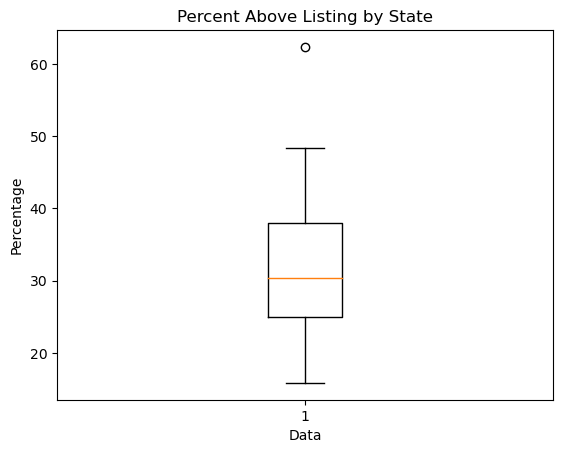

In [98]:
import matplotlib.pyplot as plt

plt.boxplot(percent_home_sold_above_list_state_sorted)

plt.xlabel('Data')
plt.ylabel('Percentage')
plt.title('Percent Above Listing by State')
plt.show()

In [99]:
close_time_by_state.name = 'Average_Days_To_Close'
percent_home_sold_above_list_state_sorted.name = 'Percent_Home_Sold_Above_List'

close_above_list_merge = pd.merge(close_time_by_state, percent_home_sold_above_list_state_sorted, on='StateName')
close_above_list_merge.head()


StateName  Avg_Days_To_Close  Percent_Home_Sold_Above_List
0        NY          54.941176                     39.790637
1        HI          46.750000                     17.355008
2        MA          44.352941                     47.223173
3        CT          44.345588                     38.509907
4        NJ          42.514706                     29.010449

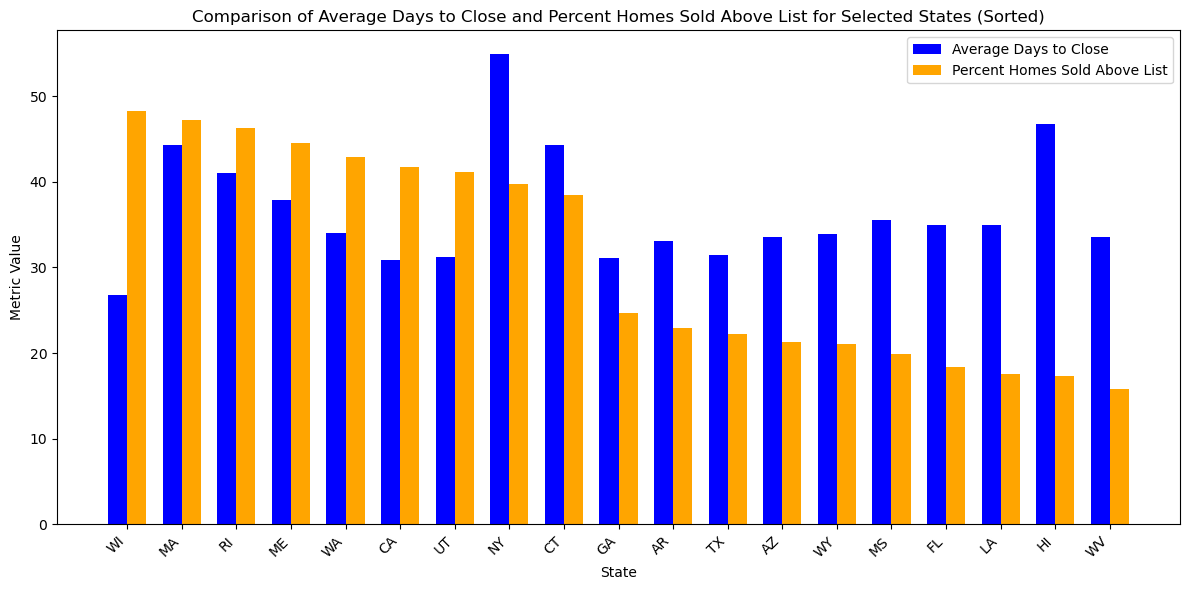

In [100]:
selected_states = ['WV', 'HI', 'LA', 'FL', 'MS', 'WA','NH', 'WI', 'MA', 'RI', 'ME', 'CA', 'UT', 'NY', 'CT', 'NY', 'WY', 'AZ', 'TX', 'AR', 'GA']

#select my state in top 10 
selected_states_data = close_above_list_merge[close_above_list_merge['StateName'].isin(selected_states)]

#biggest to small or vise versa? 
selected_states_data_sorted = selected_states_data.sort_values(by='Percent_Home_Sold_Above_List', ascending=False)

plt.figure(figsize=(12, 6))
bar_width = 0.35

index = range(len(selected_states_data_sorted['StateName']))

plt.bar(index, selected_states_data_sorted['Avg_Days_To_Close'], bar_width, label='Average Days to Close', color='blue')
plt.bar([i + bar_width for i in index], selected_states_data_sorted['Percent_Home_Sold_Above_List'], bar_width, label='Percent Homes Sold Above List', color='orange')

plt.xlabel('State')
plt.ylabel('Metric Value')
plt.title('Comparison of Average Days to Close and Percent Homes Sold Above List for Selected States (Sorted)')
plt.xticks([i + bar_width / 2 for i in index], selected_states_data_sorted['StateName'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Average Days to Close vs. Percent Homes Sold Above List for Selected States')

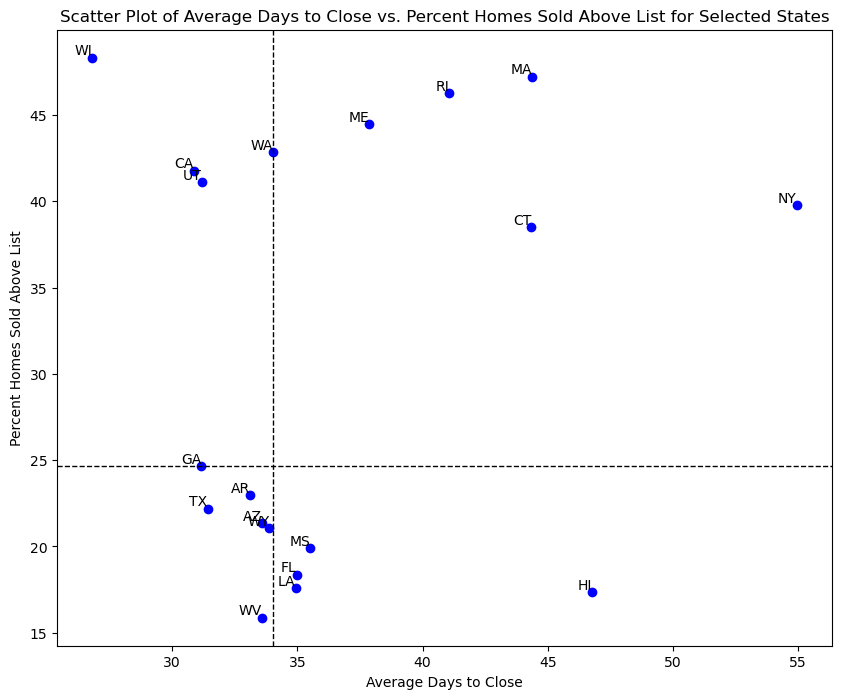

In [101]:
plt.figure(figsize=(10, 8))

plt.axvline(x=selected_states_data_sorted['Avg_Days_To_Close'].median(), color='black', linestyle='--', linewidth=1, label='Median Days to Close')
plt.axhline(y=selected_states_data_sorted['Percent_Home_Sold_Above_List'].median(), color='black', linestyle='--', linewidth=1, label='Average Percent Homes Sold Above List')


scatter = plt.scatter(selected_states_data_sorted['Avg_Days_To_Close'], selected_states_data_sorted['Percent_Home_Sold_Above_List'], color='blue')
for i, txt in enumerate(selected_states_data_sorted['StateName']):
    plt.text(selected_states_data_sorted['Avg_Days_To_Close'].iloc[i], selected_states_data_sorted['Percent_Home_Sold_Above_List'].iloc[i], txt, ha='right', va='bottom')

plt.xlabel('Average Days to Close')
plt.ylabel('Percent Homes Sold Above List')
plt.title('Scatter Plot of Average Days to Close vs. Percent Homes Sold Above List for Selected States')

In [102]:
home_value_forecast.head()

RegionID  SizeRank       RegionName RegionType StateName   BaseDate  \
0    102001         0    United States    country       USA  9/30/2023   
1    394913         1     New York, NY        msa        NY  9/30/2023   
2    753899         2  Los Angeles, CA        msa        CA  9/30/2023   
3    394463         3      Chicago, IL        msa        IL  9/30/2023   
4    394514         4       Dallas, TX        msa        TX  9/30/2023   

   10/31/2023  12/31/2023  9/30/2024  
0         0.3         0.7        2.2  
1         0.2         0.1       -0.9  
2         1.0         1.7        1.0  
3         0.4         0.5       -0.1  
4         0.1         0.0        1.4

In [103]:
forecast_state_2024 = ['StateName', '9/30/2024']
home_value_forecast_state = home_value_forecast.rename(columns={'9/30/2024': 'Percent Change'})

home_value_forecast_state.head()

RegionID  SizeRank       RegionName RegionType StateName   BaseDate  \
0    102001         0    United States    country       USA  9/30/2023   
1    394913         1     New York, NY        msa        NY  9/30/2023   
2    753899         2  Los Angeles, CA        msa        CA  9/30/2023   
3    394463         3      Chicago, IL        msa        IL  9/30/2023   
4    394514         4       Dallas, TX        msa        TX  9/30/2023   

   10/31/2023  12/31/2023  Percent Change  
0         0.3         0.7             2.2  
1         0.2         0.1            -0.9  
2         1.0         1.7             1.0  
3         0.4         0.5            -0.1  
4         0.1         0.0             1.4

In [104]:
forecast_state_average_values = home_value_forecast.groupby('StateName')['9/30/2024'].mean()

forecast_state_average_values.head()

StateName
AK   -2.725000
AL    0.900000
AR   -0.755000
AZ    3.230000
CA    0.067647
Name: 9/30/2024, dtype: float64

In [105]:
forecast_state_average_values_sorted = forecast_state_average_values.sort_values(ascending=False)
forecast_state_average_values_sorted

StateName
NH     5.120000
ME     5.075000
ID     4.784615
NJ     4.175000
MT     4.042857
TN     3.984615
NC     3.889189
GA     3.735135
UT     3.722222
FL     3.593103
CT     3.320000
AZ     3.230000
DE     3.000000
MA     3.000000
IN     2.450000
WA     2.425000
VT     2.425000
RI     2.400000
CO     2.364706
USA    2.200000
HI     1.950000
WI     1.913043
OR     1.910000
NY     1.692308
OH     1.656818
KY     1.650000
KS     1.555556
MI     1.532258
VA     1.478571
WY     1.388889
NV     1.311111
SC     1.273333
OK     1.042857
MO     0.996000
AL     0.900000
MN     0.847619
NE     0.608333
SD     0.590909
MD     0.566667
PA     0.482353
CA     0.067647
IA    -0.305263
IL    -0.361538
TX    -0.670149
AR    -0.755000
WV    -0.771429
NM    -0.827778
ND    -2.528571
AK    -2.725000
MS    -2.940000
LA    -4.841176
Name: 9/30/2024, dtype: float64

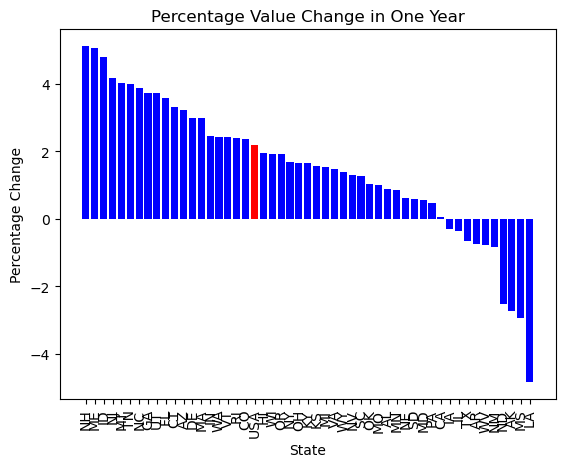

In [106]:


bar_width = 0.8 
colors = ['red' if state == 'USA' else 'blue' for state in forecast_state_average_values_sorted.index]
plt.bar(forecast_state_average_values_sorted.index, forecast_state_average_values_sorted, color=colors)
plt.ylabel('Percentage Change')
plt.xlabel('State')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Percentage Value Change in One Year')
plt.show()

In [107]:
average_home_value_index_sorted.head()

StateName
HI    503587.379515
CA    452904.424881
MA    321785.331398
WA    292478.854890
RI    269240.980126
dtype: float64

In [108]:
forecast_state_average_values_sorted.head()

StateName
NH    5.120000
ME    5.075000
ID    4.784615
NJ    4.175000
MT    4.042857
Name: 9/30/2024, dtype: float64

In [109]:
home_value_forecast_state.head()

RegionID  SizeRank       RegionName RegionType StateName   BaseDate  \
0    102001         0    United States    country       USA  9/30/2023   
1    394913         1     New York, NY        msa        NY  9/30/2023   
2    753899         2  Los Angeles, CA        msa        CA  9/30/2023   
3    394463         3      Chicago, IL        msa        IL  9/30/2023   
4    394514         4       Dallas, TX        msa        TX  9/30/2023   

   10/31/2023  12/31/2023  Percent Change  
0         0.3         0.7             2.2  
1         0.2         0.1            -0.9  
2         1.0         1.7             1.0  
3         0.4         0.5            -0.1  
4         0.1         0.0             1.4

In [110]:
mean_forecast_by_state = home_value_forecast_state.groupby('StateName')['Percent Change'].mean()

mean_forecast_by_state

StateName
AK    -2.725000
AL     0.900000
AR    -0.755000
AZ     3.230000
CA     0.067647
CO     2.364706
CT     3.320000
DE     3.000000
FL     3.593103
GA     3.735135
HI     1.950000
IA    -0.305263
ID     4.784615
IL    -0.361538
IN     2.450000
KS     1.555556
KY     1.650000
LA    -4.841176
MA     3.000000
MD     0.566667
ME     5.075000
MI     1.532258
MN     0.847619
MO     0.996000
MS    -2.940000
MT     4.042857
NC     3.889189
ND    -2.528571
NE     0.608333
NH     5.120000
NJ     4.175000
NM    -0.827778
NV     1.311111
NY     1.692308
OH     1.656818
OK     1.042857
OR     1.910000
PA     0.482353
RI     2.400000
SC     1.273333
SD     0.590909
TN     3.984615
TX    -0.670149
USA    2.200000
UT     3.722222
VA     1.478571
VT     2.425000
WA     2.425000
WI     1.913043
WV    -0.771429
WY     1.388889
Name: Percent Change, dtype: float64

In [111]:
mean_forecast_by_state_df = mean_forecast_by_state.reset_index()
mean_forecast_by_state_df

StateName  Percent Change
0         AK       -2.725000
1         AL        0.900000
2         AR       -0.755000
3         AZ        3.230000
4         CA        0.067647
5         CO        2.364706
6         CT        3.320000
7         DE        3.000000
8         FL        3.593103
9         GA        3.735135
10        HI        1.950000
11        IA       -0.305263
12        ID        4.784615
13        IL       -0.361538
14        IN        2.450000
15        KS        1.555556
16        KY        1.650000
17        LA       -4.841176
18        MA        3.000000
19        MD        0.566667
20        ME        5.075000
21        MI        1.532258
22        MN        0.847619
23        MO        0.996000
24        MS       -2.940000
25        MT        4.042857
26        NC        3.889189
27        ND       -2.528571
28        NE        0.608333
29        NH        5.120000
30        NJ        4.175000
31        NM       -0.827778
32        NV        1.311111
33        NY        1.692308
34        OH        1.656818
35        OK        1.042857
36        OR        1.910000
37        PA        0.482353
38        RI        2.400000
39        SC        1.273333
40        SD        0.590909
41        TN        3.984615
42        TX       -0.670149
43       USA        2.200000
44        UT        3.722222
45        VA        1.478571
46        VT        2.425000
47        WA        2.425000
48        WI        1.913043
49        WV       -0.771429
50        WY        1.388889

In [112]:
mean_forecast_by_state_df['Percent Change'] = mean_forecast_by_state_df['Percent Change'] / 100

mean_forecast_by_state_df

StateName  Percent Change
0         AK       -0.027250
1         AL        0.009000
2         AR       -0.007550
3         AZ        0.032300
4         CA        0.000676
5         CO        0.023647
6         CT        0.033200
7         DE        0.030000
8         FL        0.035931
9         GA        0.037351
10        HI        0.019500
11        IA       -0.003053
12        ID        0.047846
13        IL       -0.003615
14        IN        0.024500
15        KS        0.015556
16        KY        0.016500
17        LA       -0.048412
18        MA        0.030000
19        MD        0.005667
20        ME        0.050750
21        MI        0.015323
22        MN        0.008476
23        MO        0.009960
24        MS       -0.029400
25        MT        0.040429
26        NC        0.038892
27        ND       -0.025286
28        NE        0.006083
29        NH        0.051200
30        NJ        0.041750
31        NM       -0.008278
32        NV        0.013111
33        NY        0.016923
34        OH        0.016568
35        OK        0.010429
36        OR        0.019100
37        PA        0.004824
38        RI        0.024000
39        SC        0.012733
40        SD        0.005909
41        TN        0.039846
42        TX       -0.006701
43       USA        0.022000
44        UT        0.037222
45        VA        0.014786
46        VT        0.024250
47        WA        0.024250
48        WI        0.019130
49        WV       -0.007714
50        WY        0.013889

In [113]:
mean_forecast_by_state

StateName
AK    -2.725000
AL     0.900000
AR    -0.755000
AZ     3.230000
CA     0.067647
CO     2.364706
CT     3.320000
DE     3.000000
FL     3.593103
GA     3.735135
HI     1.950000
IA    -0.305263
ID     4.784615
IL    -0.361538
IN     2.450000
KS     1.555556
KY     1.650000
LA    -4.841176
MA     3.000000
MD     0.566667
ME     5.075000
MI     1.532258
MN     0.847619
MO     0.996000
MS    -2.940000
MT     4.042857
NC     3.889189
ND    -2.528571
NE     0.608333
NH     5.120000
NJ     4.175000
NM    -0.827778
NV     1.311111
NY     1.692308
OH     1.656818
OK     1.042857
OR     1.910000
PA     0.482353
RI     2.400000
SC     1.273333
SD     0.590909
TN     3.984615
TX    -0.670149
USA    2.200000
UT     3.722222
VA     1.478571
VT     2.425000
WA     2.425000
WI     1.913043
WV    -0.771429
WY     1.388889
Name: Percent Change, dtype: float64

In [114]:
average_home_value_index

StateName
AL     141661.929915
AR     102207.609773
AZ     184032.939936
CA     452904.424881
CO     258598.026358
CT     238510.480331
DE     256593.758754
FL     183210.181064
GA     112110.052617
HI     503587.379515
IA     155999.311428
ID     189130.940564
IL     109015.041180
IN     135291.081186
KS     114065.405129
KY     113195.653507
LA     193500.193912
MA     321785.331398
MD     258229.738884
ME     155248.159569
MI     135440.602807
MN     186193.097634
MO     153969.178031
NC     141277.250073
NE     160876.339331
NH     222590.064132
NJ     231985.614245
NV     254638.676061
NY     121225.124518
OH     116486.305077
OK      98962.872663
OR     236401.058980
PA     132909.450089
RI     269240.980126
SC     192539.824180
TN     140498.738724
TX     162828.023538
USA    200007.628547
UT     254766.713262
VA     165532.770293
VT     240113.140755
WA     292478.854890
WI     206730.683142
WV     102256.708006
dtype: float64

In [115]:
forecast_and_value = pd.concat([average_home_value_index, mean_forecast_by_state], axis=1)


forecast_and_value.columns = ['Home Value', 'Percent Change']

forecast_and_value

Home Value  Percent Change
StateName                               
AL         141661.929915        0.900000
AR         102207.609773       -0.755000
AZ         184032.939936        3.230000
CA         452904.424881        0.067647
CO         258598.026358        2.364706
CT         238510.480331        3.320000
DE         256593.758754        3.000000
FL         183210.181064        3.593103
GA         112110.052617        3.735135
HI         503587.379515        1.950000
IA         155999.311428       -0.305263
ID         189130.940564        4.784615
IL         109015.041180       -0.361538
IN         135291.081186        2.450000
KS         114065.405129        1.555556
KY         113195.653507        1.650000
LA         193500.193912       -4.841176
MA         321785.331398        3.000000
MD         258229.738884        0.566667
ME         155248.159569        5.075000
MI         135440.602807        1.532258
MN         186193.097634        0.847619
MO         153969.178031        0.996000
NC         141277.250073        3.889189
NE         160876.339331        0.608333
NH         222590.064132        5.120000
NJ         231985.614245        4.175000
NV         254638.676061        1.311111
NY         121225.124518        1.692308
OH         116486.305077        1.656818
OK          98962.872663        1.042857
OR         236401.058980        1.910000
PA         132909.450089        0.482353
RI         269240.980126        2.400000
SC         192539.824180        1.273333
TN         140498.738724        3.984615
TX         162828.023538       -0.670149
USA        200007.628547        2.200000
UT         254766.713262        3.722222
VA         165532.770293        1.478571
VT         240113.140755        2.425000
WA         292478.854890        2.425000
WI         206730.683142        1.913043
WV         102256.708006       -0.771429
AK                   NaN       -2.725000
MS                   NaN       -2.940000
MT                   NaN        4.042857
ND                   NaN       -2.528571
NM                   NaN       -0.827778
SD                   NaN        0.590909
WY                   NaN        1.388889

In [116]:
forecast_and_value_cleaned = forecast_and_value.dropna()

In [117]:
forecast_and_value_cleaned

Home Value  Percent Change
StateName                               
AL         141661.929915        0.900000
AR         102207.609773       -0.755000
AZ         184032.939936        3.230000
CA         452904.424881        0.067647
CO         258598.026358        2.364706
CT         238510.480331        3.320000
DE         256593.758754        3.000000
FL         183210.181064        3.593103
GA         112110.052617        3.735135
HI         503587.379515        1.950000
IA         155999.311428       -0.305263
ID         189130.940564        4.784615
IL         109015.041180       -0.361538
IN         135291.081186        2.450000
KS         114065.405129        1.555556
KY         113195.653507        1.650000
LA         193500.193912       -4.841176
MA         321785.331398        3.000000
MD         258229.738884        0.566667
ME         155248.159569        5.075000
MI         135440.602807        1.532258
MN         186193.097634        0.847619
MO         153969.178031        0.996000
NC         141277.250073        3.889189
NE         160876.339331        0.608333
NH         222590.064132        5.120000
NJ         231985.614245        4.175000
NV         254638.676061        1.311111
NY         121225.124518        1.692308
OH         116486.305077        1.656818
OK          98962.872663        1.042857
OR         236401.058980        1.910000
PA         132909.450089        0.482353
RI         269240.980126        2.400000
SC         192539.824180        1.273333
TN         140498.738724        3.984615
TX         162828.023538       -0.670149
USA        200007.628547        2.200000
UT         254766.713262        3.722222
VA         165532.770293        1.478571
VT         240113.140755        2.425000
WA         292478.854890        2.425000
WI         206730.683142        1.913043
WV         102256.708006       -0.771429

In [118]:
forecast_and_value_cleaned.loc[:, 'Numeric Change'] = (forecast_and_value_cleaned['Home Value'] * (forecast_and_value_cleaned['Percent Change'] / 100))
forecast_and_value_cleaned

/var/folders/56/wzl5wl5d1v55x1x3x1q7_h_r0000gn/T/ipykernel_17491/3118446686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_and_value_cleaned.loc[:, 'Numeric Change'] = (forecast_and_value_cleaned['Home Value'] * (forecast_and_value_cleaned['Percent Change'] / 100))


Home Value  Percent Change  Numeric Change
StateName                                               
AL         141661.929915        0.900000     1274.957369
AR         102207.609773       -0.755000     -771.667454
AZ         184032.939936        3.230000     5944.263960
CA         452904.424881        0.067647      306.376523
CO         258598.026358        2.364706     6115.082741
CT         238510.480331        3.320000     7918.547947
DE         256593.758754        3.000000     7697.812763
FL         183210.181064        3.593103     6582.931333
GA         112110.052617        3.735135     4187.461965
HI         503587.379515        1.950000     9819.953901
IA         155999.311428       -0.305263     -476.208424
ID         189130.940564        4.784615     9049.188079
IL         109015.041180       -0.361538     -394.131303
IN         135291.081186        2.450000     3314.631489
KS         114065.405129        1.555556     1774.350746
KY         113195.653507        1.650000     1867.728283
LA         193500.193912       -4.841176    -9367.685858
MA         321785.331398        3.000000     9653.559942
MD         258229.738884        0.566667     1463.301854
ME         155248.159569        5.075000     7878.844098
MI         135440.602807        1.532258     2075.299559
MN         186193.097634        0.847619     1578.208161
MO         153969.178031        0.996000     1533.533013
NC         141277.250073        3.889189     5494.539537
NE         160876.339331        0.608333      978.664398
NH         222590.064132        5.120000    11396.611284
NJ         231985.614245        4.175000     9685.399395
NV         254638.676061        1.311111     3338.595975
NY         121225.124518        1.692308     2051.502107
OH         116486.305077        1.656818     1929.966282
OK          98962.872663        1.042857     1032.041386
OR         236401.058980        1.910000     4515.260227
PA         132909.450089        0.482353      641.092642
RI         269240.980126        2.400000     6461.783523
SC         192539.824180        1.273333     2451.673761
TN         140498.738724        3.984615     5598.334358
TX         162828.023538       -0.670149    -1091.190785
USA        200007.628547        2.200000     4400.167828
UT         254766.713262        3.722222     9482.983216
VA         165532.770293        1.478571     2447.520246
VT         240113.140755        2.425000     5822.743663
WA         292478.854890        2.425000     7092.612231
WI         206730.683142        1.913043     3954.847851
WV         102256.708006       -0.771429     -788.837462

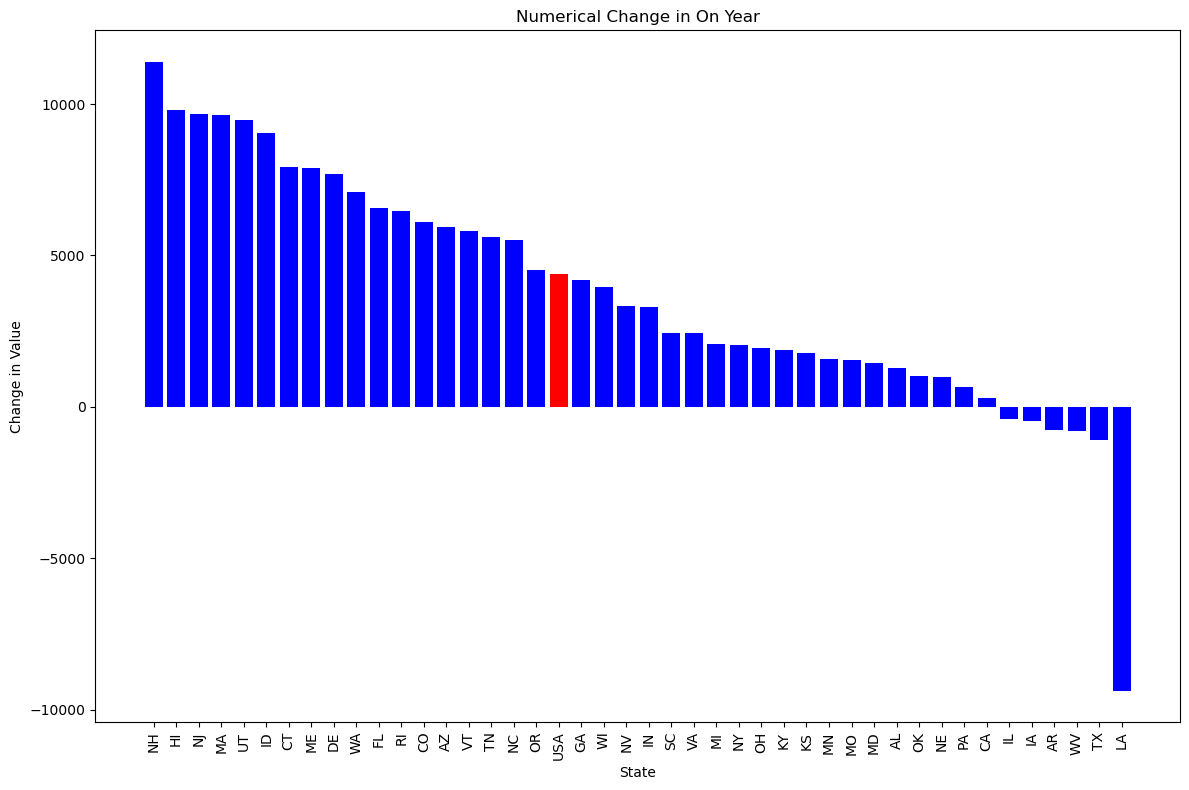

In [119]:
numerical_change_df = forecast_and_value_cleaned.sort_values(by='Numeric Change', ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(numerical_change_df.index, numerical_change_df['Numeric Change'], color=['red' if state == 'USA' else 'blue' for state in numerical_change_df.index])
plt.xlabel('State')
plt.ylabel('Change in Value')
plt.title('Numerical Change in On Year')
plt.xticks(rotation=90)
plt.tight_layout()

In [120]:
# Only show the last five years of data
rent_index_labels = rent_index.loc[:, :"StateName"]
rent_index_5_year_sample_data = rent_index.loc[:, '1/31/2019':]
rent_index = pd.concat([rent_index_labels, rent_index_5_year_sample_data], axis=1)
rent_index

RegionID  SizeRank       RegionName RegionType StateName    1/31/2019  \
0      102001         0    United States    country       USA  1506.568692   
1      394913         1     New York, NY        msa        NY  2658.028349   
2      753899         2  Los Angeles, CA        msa        CA  2355.375787   
3      394463         3      Chicago, IL        msa        IL  1565.786358   
4      394514         4       Dallas, TX        msa        TX  1359.153968   
..        ...       ...              ...        ...       ...          ...   
590    845169       874     Rockport, TX        msa        TX          NaN   
591    394687       875   Hood River, OR        msa        OR          NaN   
592    395130       890     Sterling, CO        msa        CO          NaN   
593    394718       892    Jamestown, ND        msa        ND          NaN   
594    394996       915     Portales, NM        msa        NM          NaN   

       2/28/2019    3/31/2019    4/30/2019    5/31/2019  ...   12/31/2022  \
0    1513.380545  1523.915227  1534.331888  1544.459589  ...  1975.835739   
1    2668.015671  2683.323173  2701.774818  2722.386695  ...  3192.662155   
2    2359.531110  2371.921090  2382.457988  2394.400609  ...  2924.394108   
3    1576.210790  1591.536771  1605.172516  1616.780748  ...  1860.947800   
4    1364.538063  1375.769333  1385.452265  1394.090214  ...  1795.720424   
..           ...          ...          ...          ...  ...          ...   
590          NaN          NaN          NaN          NaN  ...          NaN   
591          NaN          NaN          NaN          NaN  ...          NaN   
592          NaN          NaN          NaN          NaN  ...          NaN   
593          NaN          NaN          NaN          NaN  ...   787.488592   
594          NaN          NaN          NaN          NaN  ...          NaN   

       1/31/2023    2/28/2023    3/31/2023    4/30/2023    5/31/2023  \
0    1977.938133  1983.983289  1992.489296  2003.280119  2015.846679   
1    3186.090274  3201.305375  3227.659771  3264.971399  3305.837389   
2    2920.801579  2928.269343  2936.661995  2951.164632  2958.004259   
3    1868.049689  1880.888532  1893.637877  1909.273200  1932.058153   
4    1793.799306  1796.900598  1802.831095  1806.282541  1813.190759   
..           ...          ...          ...          ...          ...   
590          NaN          NaN          NaN          NaN          NaN   
591          NaN          NaN          NaN          NaN          NaN   
592          NaN          NaN          NaN          NaN          NaN   
593   791.100033   817.419504   839.187519   865.433625   866.851557   
594          NaN          NaN          NaN          NaN   924.352133   

       6/30/2023    7/31/2023    8/31/2023    9/30/2023  
0    2026.886830  2037.184481  2043.719504  2047.095633  
1    3343.975859  3369.088119  3378.231065  3376.205700  
2    2968.798884  2982.964790  2995.886668  3001.423728  
3    1952.481379  1965.321340  1972.630211  1971.321022  
4    1821.711844  1830.681080  1832.988133  1829.204295  
..           ...          ...          ...          ...  
590          NaN          NaN  1534.970000  1525.000000  
591  2180.467751  2239.970719  2254.306482  2132.777778  
592          NaN          NaN          NaN   880.000000  
593   865.791510   868.696063   862.929561   882.777778  
594   915.000830   914.970822   899.480127   908.465609  

[595 rows x 62 columns]

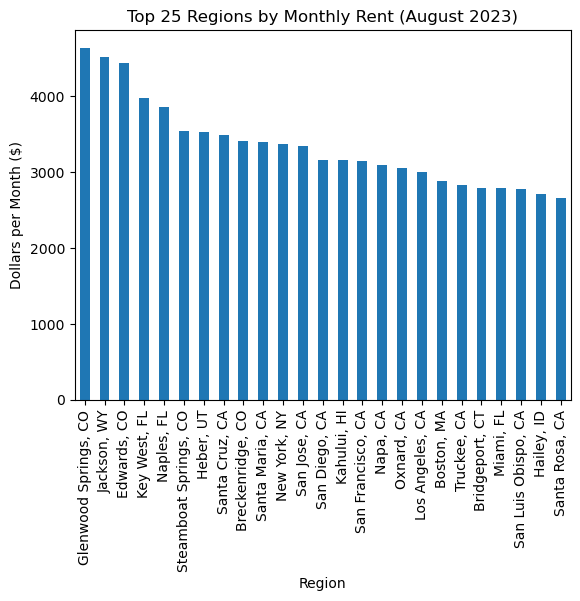

In [121]:
# Top 25 Regions by Monthly Rent
T25_rent_index_region = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
T25_rent_index_region_groupby = T25_rent_index_region.groupby('RegionName').mean()
T25_rent_index_region_groupby_org = T25_rent_index_region_groupby.nlargest(25, "8/31/2023")
T25_rent_index_region_groupby_org_recent_August = T25_rent_index_region_groupby_org.loc[:, "8/31/2023"]
T25_rent_index_region_groupby_org_recent_August.plot(kind='bar')
plt.title("Top 25 Regions by Monthly Rent (August 2023)")
plt.xlabel("Region")
plt.ylabel("Dollars per Month ($)")
plt.show()

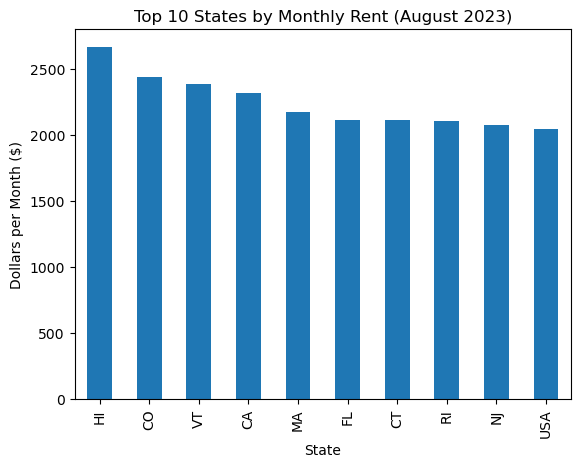

In [122]:
# Top 10 States by Monthly Rent
T10_rent_index_state = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
T10_rent_index_state_groupby = T10_rent_index_state.groupby('StateName').mean()
T10_rent_index_state_groupby_org = T10_rent_index_state_groupby.nlargest(10, "8/31/2023")
T10_rent_index_state_groupby_org_recent = T10_rent_index_state_groupby_org.loc[:, "8/31/2023"]
T10_rent_index_state_groupby_org_recent.plot(kind='bar')
plt.title("Top 10 States by Monthly Rent (August 2023)")
plt.xlabel("State")
plt.ylabel("Dollars per Month ($)")
plt.show()

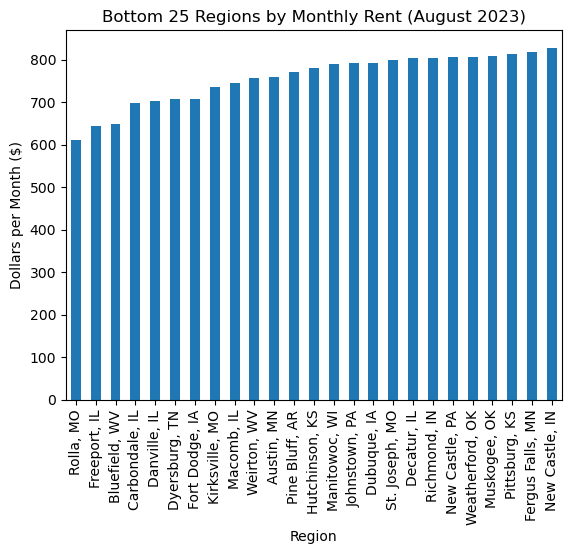

In [123]:
# Bottom 25 Regions by Monthly Rent
B25_rent_index_region = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
B25_rent_index_region_groupby = B25_rent_index_region.groupby('RegionName').mean()
B25_rent_index_region_groupby_org = B25_rent_index_region_groupby.nsmallest(25, "8/31/2023")
B25_rent_index_region_groupby_org_recent = B25_rent_index_region_groupby_org.loc[:, "8/31/2023"]
B25_rent_index_region_groupby_org_recent.plot(kind='bar')
plt.title("Bottom 25 Regions by Monthly Rent (August 2023)")
plt.xlabel("Region")
plt.ylabel("Dollars per Month ($)")
plt.show()

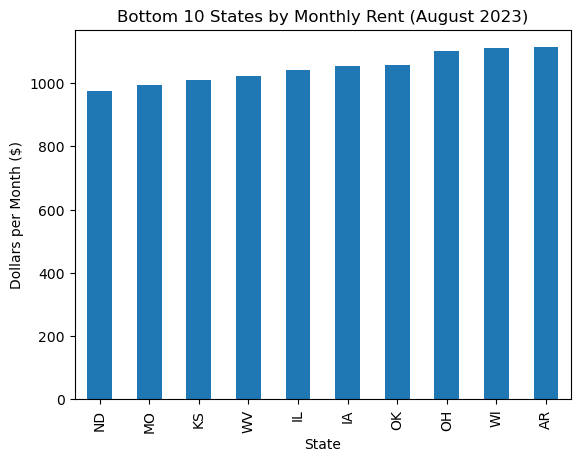

In [124]:
# Bottom 10 States by Monthly Rent
B10_rent_index_state = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
B10_rent_index_state_groupby = B10_rent_index_state.groupby('StateName').mean()
B10_rent_index_state_groupby_org = B10_rent_index_state_groupby.nsmallest(10, "8/31/2023")
B10_rent_index_state_groupby_org_recent = B10_rent_index_state_groupby_org.loc[:, "8/31/2023"]
B10_rent_index_state_groupby_org_recent.plot(kind='bar')
plt.title("Bottom 10 States by Monthly Rent (August 2023)")
plt.xlabel("State")
plt.ylabel("Dollars per Month ($)")
plt.show()

In [125]:
# Only show the last five years of data
madian_sale_price_labels = madian_sale_price.loc[:, :"StateName"]
madian_sale_price_5_year_sample_data = madian_sale_price.loc[:, '1/31/2019':]
madian_sale_price = pd.concat([madian_sale_price_labels, madian_sale_price_5_year_sample_data], axis=1)
madian_sale_price

RegionID  SizeRank                  RegionName RegionType StateName  \
0      102001         0               United States    country       USA   
1      394913         1                New York, NY        msa        NY   
2      753899         2             Los Angeles, CA        msa        CA   
3      394463         3                 Chicago, IL        msa        IL   
4      394514         4                  Dallas, TX        msa        TX   
..        ...       ...                         ...        ...       ...   
573    395206       825  Washington Court House, OH        msa        OH   
574    394864       833           Mineral Wells, TX        msa        TX   
575    395159       848                  Toccoa, GA        msa        GA   
576    753921       867       Steamboat Springs, CO        msa        CO   
577    394718       892               Jamestown, ND        msa        ND   

     1/31/2019  2/28/2019  3/31/2019  4/30/2019  5/31/2019  ...  11/30/2022  \
0     230000.0   230000.0   239900.0   245000.0   251000.0  ...    325000.0   
1     390000.0   395000.0   389000.0   395000.0   403000.0  ...    520000.0   
2     601000.0   615000.0   630000.0   640000.0   640000.0  ...    830000.0   
3     217000.0   222000.0   234500.0   240000.0   245000.0  ...    275000.0   
4     240000.0   249900.0   260000.0   263000.0   275000.0  ...    375000.0   
..         ...        ...        ...        ...        ...  ...         ...   
573        NaN        NaN        NaN        NaN        NaN  ...         NaN   
574        NaN        NaN        NaN        NaN        NaN  ...         NaN   
575   104000.0   133500.0   105900.0   120750.0   165000.0  ...    205500.0   
576   482500.0   459000.0   404000.0   464000.0   485000.0  ...    806000.0   
577        NaN        NaN        NaN        NaN        NaN  ...         NaN   

     12/31/2022  1/31/2023  2/28/2023  3/31/2023  4/30/2023  5/31/2023  \
0      320000.0   320000.0   329755.0   340000.0   350000.0   360000.0   
1      510000.0   520000.0   505000.0   515000.0   539000.0   565000.0   
2      810000.0   815000.0   825000.0   841000.0   850000.0   868000.0   
3      270000.0   265000.0   272000.0   290000.0   300000.0   310000.0   
4      360000.0   355000.0   372000.0   374700.0   385000.0   395000.0   
..          ...        ...        ...        ...        ...        ...   
573         NaN        NaN        NaN   150000.0   160500.0   139000.0   
574         NaN        NaN   230000.0   279000.0   215000.0   280000.0   
575    198500.0   228500.0   163125.0   191500.0   200000.0   226000.0   
576   1025000.0   774125.0   677500.0   522500.0   841250.0   790000.0   
577         NaN        NaN        NaN        NaN        NaN        NaN   

     6/30/2023  7/31/2023  8/31/2023  
0     366000.0   362000.0     360000  
1     585000.0   600000.0     610000  
2     900000.0   895000.0     900000  
3     326050.0   319700.0     320000  
4     405000.0   400000.0     395000  
..         ...        ...        ...  
573   180000.0   174500.0     195000  
574   285000.0   250750.0     242500  
575   202500.0   213000.0     225000  
576   757000.0   897000.0     860000  
577        NaN        NaN     209000  

[578 rows x 61 columns]

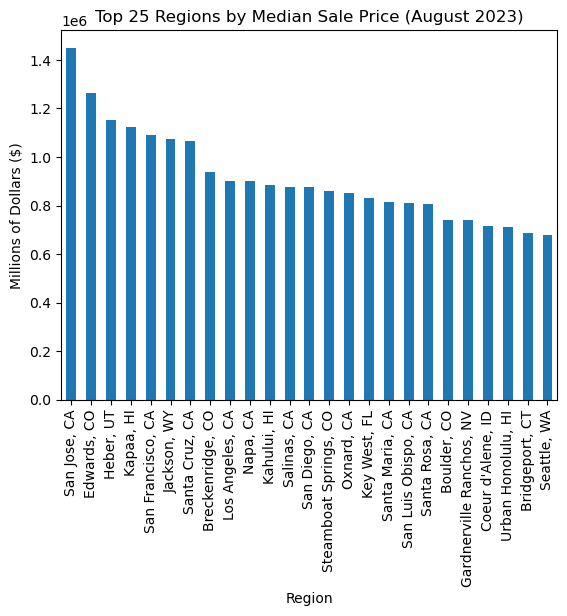

In [130]:
# Top 25 Regions by Median Sale Price
T25_madian_sale_price_region = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
T25_madian_sale_price_region_groupby = T25_madian_sale_price_region.groupby('RegionName').mean()
T25_madian_sale_price_region_groupby_org = T25_madian_sale_price_region_groupby.nlargest(25, "8/31/2023")
T25_madian_sale_price_region_groupby_org_recent = T25_madian_sale_price_region_groupby_org.loc[:, "8/31/2023"]
T25_madian_sale_price_region_groupby_org_recent.plot(kind='bar')
plt.title("Top 25 Regions by Median Sale Price (August 2023)")
plt.xlabel("Region")
plt.ylabel("Millions of Dollars ($)")
plt.show()

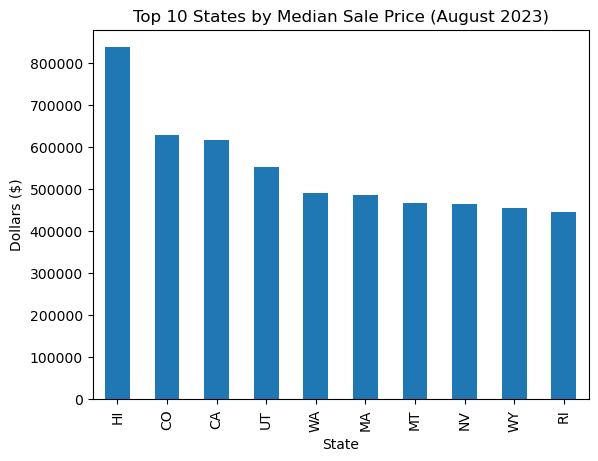

In [131]:
# Top 10 States by Median Sale Price
T10_madian_sale_price_state = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
T10_madian_sale_price_state_groupby = T10_madian_sale_price_state.groupby('StateName').mean()
T10_madian_sale_price_state_groupby_org = T10_madian_sale_price_state_groupby.nlargest(10, "8/31/2023")
T10_madian_sale_price_state_groupby_org_recent = T10_madian_sale_price_state_groupby_org.loc[:, "8/31/2023"]
T10_madian_sale_price_state_groupby_org_recent.plot(kind='bar')
plt.title("Top 10 States by Median Sale Price (August 2023)")
plt.xlabel("State")
plt.ylabel("Dollars ($)")
plt.show()

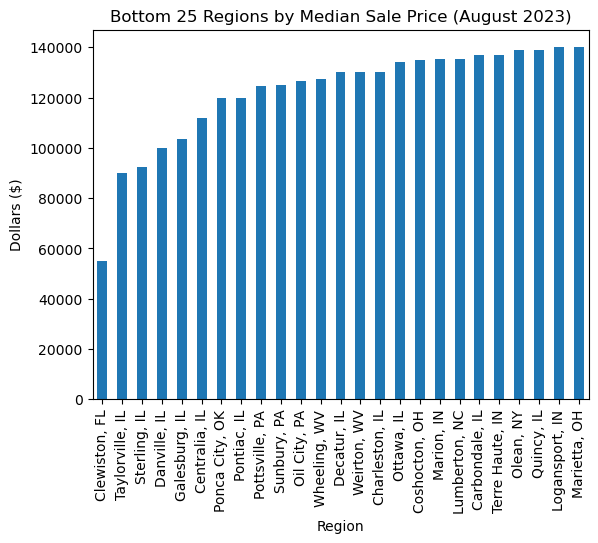

In [133]:
# Bottom 25 Regions by Home Value
B25_madian_sale_price_region = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
B25_madian_sale_price_region_groupby = B25_madian_sale_price_region.groupby('RegionName').mean()
B25_madian_sale_price_region_groupby_org = B25_madian_sale_price_region_groupby.nsmallest(25, "8/31/2023")
B25_madian_sale_price_region_groupby_org_recent = B25_madian_sale_price_region_groupby_org.loc[:, "8/31/2023"]
B25_madian_sale_price_region_groupby_org_recent.plot(kind='bar')
plt.title("Bottom 25 Regions by Median Sale Price (August 2023)")
plt.xlabel("Region")
plt.ylabel("Dollars ($)")
plt.show()

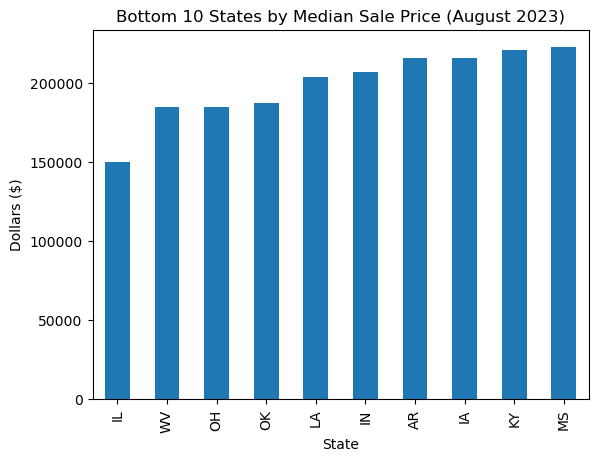

In [135]:
# Bottom 10 States by Home Value
B10_madian_sale_price_state = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
B10_madian_sale_price_state_groupby = B10_madian_sale_price_state.groupby('StateName').mean()
B10_madian_sale_price_state_groupby_org = B10_madian_sale_price_state_groupby.nsmallest(10, "8/31/2023")
B10_madian_sale_price_state_groupby_org_recent = B10_madian_sale_price_state_groupby_org.loc[:, "8/31/2023"]
B10_madian_sale_price_state_groupby_org_recent.plot(kind='bar')
plt.title("Bottom 10 States by Median Sale Price (August 2023)")
plt.xlabel("State")
plt.ylabel("Dollars ($)")
plt.show()

In [65]:
# Organize Rent Index data
rent_index_region = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
rent_index_region_groupby = rent_index_region.groupby('RegionName').mean()
rent_index_region_groupby_recent = rent_index_region_groupby["8/31/2023"]
rent_index_region_groupby_recent_df = pd.DataFrame({'Region': rent_index_region_groupby_recent.index, 'Rent': rent_index_region_groupby_recent.values})
rent_index_region_groupby_recent_df = rent_index_region_groupby_recent_df.groupby('Region').mean()
rent_index_region_groupby_recent_df_RI = rent_index_region_groupby_recent_df.rename(columns={"Rent":"8/31/2023 - RI"})
rent_index_region_groupby_recent_df_RI

8/31/2023 - RI
Region                        
Aberdeen, WA       1310.091583
Abilene, TX        1215.852681
Ada, OK             940.728310
Adrian, MI         1210.098387
Akron, OH          1209.298394
...                        ...
York, PA           1210.904835
Youngstown, OH      906.580920
Yuba City, CA      1778.751068
Yuma, AZ           1449.789472
Zanesville, OH      898.909470

[595 rows x 1 columns]

In [66]:
# Organize Median Sale Price data
madian_sale_price_region = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
madian_sale_price_region_groupby = madian_sale_price_region.groupby('RegionName').mean()
madian_sale_price_region_groupby_recent = madian_sale_price_region_groupby.loc[:, "8/31/2023"]
madian_sale_price_region_groupby_recent_df = pd.DataFrame({'Region': madian_sale_price_region_groupby_recent.index, 'Rent': madian_sale_price_region_groupby_recent.values})
madian_sale_price_region_groupby_recent_df = madian_sale_price_region_groupby_recent_df.groupby('Region').mean()
madian_sale_price_region_groupby_recent__df_MSP = madian_sale_price_region_groupby_recent_df.rename(columns={"Rent":"8/31/2023 - MSP"})
madian_sale_price_region_groupby_recent__df_MSP

8/31/2023 - MSP
Region                         
Abilene, TX            220000.0
Ada, OK                150000.0
Adrian, MI             221250.0
Akron, OH              206091.0
Albany, NY             320000.0
...                         ...
Yakima, WA             375000.0
York, PA               265000.0
Youngstown, OH         155000.0
Yuma, AZ               282500.0
Zanesville, OH         196000.0

[578 rows x 1 columns]

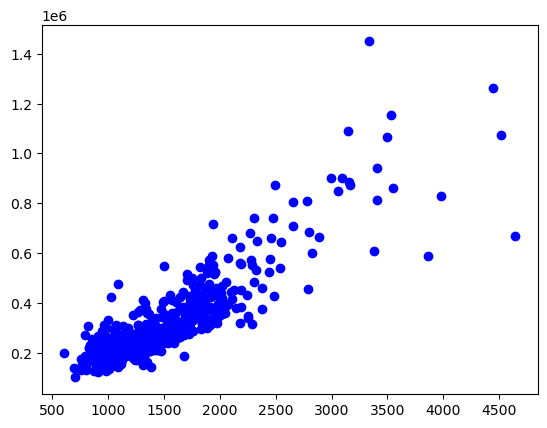

In [67]:
# Plot Scatter
scatter_plot_df = pd.concat([rent_index_region_groupby_recent_df_RI, madian_sale_price_region_groupby_recent__df_MSP], axis=1)
scatter_plot_df_cleaned = scatter_plot_df.dropna()
plt.scatter(scatter_plot_df_cleaned["8/31/2023 - RI"], scatter_plot_df_cleaned["8/31/2023 - MSP"], marker="o", facecolors="blue")

The correlation between the rent price and median sale price is 0.87


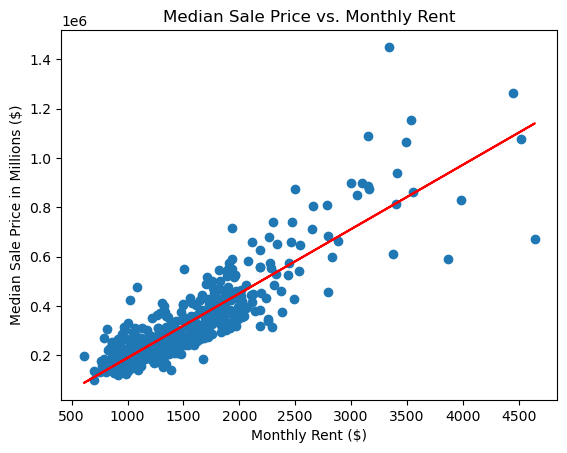

In [71]:
# Linear regression on Northern Hemisphere
x_values = scatter_plot_df_cleaned['8/31/2023 - RI']
y_values = scatter_plot_df_cleaned['8/31/2023 - MSP']

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Median Sale Price in Millions ($)')
plt.title('Median Sale Price vs. Monthly Rent')

# Calculate and show correlation
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between the rent price and median sale price is {round(correlation[0],2)}")

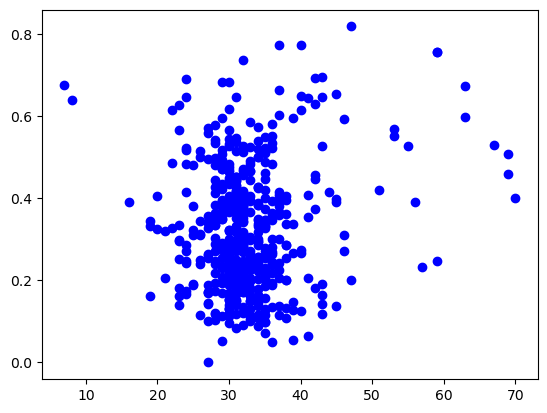

In [69]:
# Only show the last five years of data

# Median Days to Close
median_days_to_close_region = median_days_to_close.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
median_days_to_close_region_groupby = median_days_to_close_region.groupby('RegionName').mean()
median_days_to_close_region_groupby_recent = median_days_to_close_region_groupby.loc[:, "8/31/2023":]
median_days_to_close_region_groupby_recent_MDTC = median_days_to_close_region_groupby_recent.rename(columns={"8/31/2023":"8/31/2023 - MDTC"})
median_days_to_close_region_groupby_recent_MDTC

# Percent Home Sold Above list
percent_home_sold_above_list_region = percent_home_sold_above_list.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1)
percent_home_sold_above_list_region_groupby = percent_home_sold_above_list_region.groupby('RegionName').mean()
percent_home_sold_above_list_region_groupby_recent = percent_home_sold_above_list_region_groupby.loc[:, "8/31/2023":]
percent_home_sold_above_list_region_groupby_recent_PHSAL = percent_home_sold_above_list_region_groupby_recent.rename(columns={"8/31/2023":"8/31/2023 - PHSAL"})
percent_home_sold_above_list_region_groupby_recent_PHSAL

# Plot Scatter
scatter_plot_df_2 = pd.concat([median_days_to_close_region_groupby_recent_MDTC, percent_home_sold_above_list_region_groupby_recent_PHSAL], axis=1)
scatter_plot_df_2_cleaned = scatter_plot_df_2.dropna()
plt.scatter(scatter_plot_df_2_cleaned["8/31/2023 - MDTC"], scatter_plot_df_2_cleaned["8/31/2023 - PHSAL"], marker="o", facecolors="blue")

Text(0.5, 1.0, 'Scatter Plot of Median Days to Close vs. Percent Homes Sold Above List for All Regions')

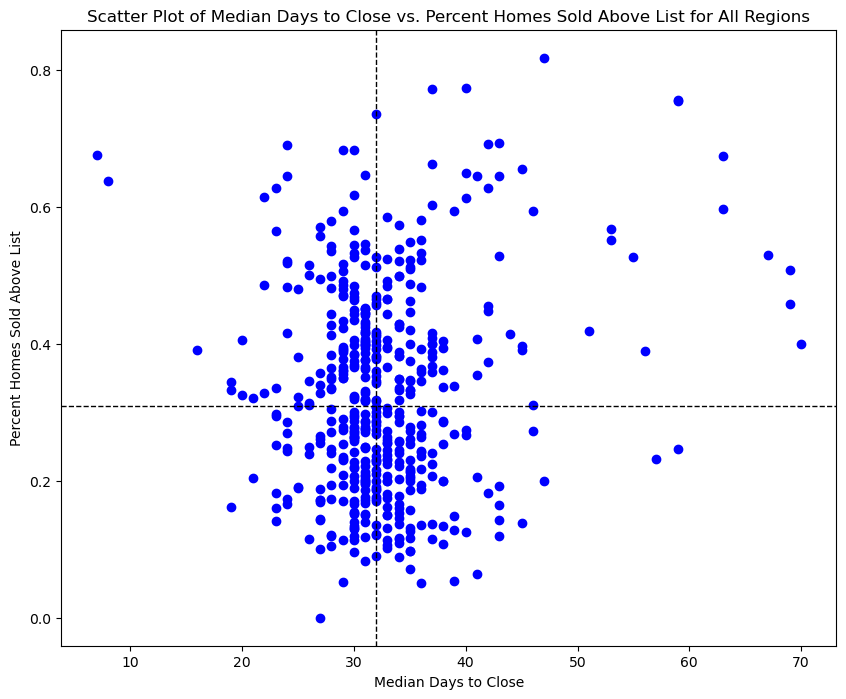

In [70]:
plt.figure(figsize=(10, 8))

# Divide the plot into four quadrants
plt.axvline(x=scatter_plot_df_2_cleaned['8/31/2023 - MDTC'].median(), color='black', linestyle='--', linewidth=1, label='Median Days to Close')
plt.axhline(y=scatter_plot_df_2_cleaned['8/31/2023 - PHSAL'].median(), color='black', linestyle='--', linewidth=1, label='Percent Homes Sold Above List')

# Plot the data points
scatter = plt.scatter(scatter_plot_df_2_cleaned["8/31/2023 - MDTC"], scatter_plot_df_2_cleaned["8/31/2023 - PHSAL"], marker="o", facecolors="blue")

# Add labels for each data point (state abbreviation)
#for i, txt in enumerate(selected_states_data_sorted['StateName']):
    #plt.text(selected_states_data_sorted['Avg_Days_To_Close'].iloc[i], selected_states_data_sorted['Percent_Home_Sold_Above_List'].iloc[i], txt, ha='right', va='bottom')
plt.xlabel('Median Days to Close')
plt.ylabel('Percent Homes Sold Above List')
plt.title('Scatter Plot of Median Days to Close vs. Percent Homes Sold Above List for All Regions')

In [611]:
# Median Sale Price By State (August 2023)
B10_madian_sale_price_state = madian_sale_price.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
B10_madian_sale_price_state_groupby = B10_madian_sale_price_state.groupby('StateName').mean()
B10_madian_sale_price_state_groupby_org = B10_madian_sale_price_state_groupby.nsmallest(51, "8/31/2023")
B10_madian_sale_price_state_groupby_org_recent = B10_madian_sale_price_state_groupby_org.loc[:, "8/31/2023"]
B10_madian_sale_price_state_groupby_org_recent_df = B10_madian_sale_price_state_groupby_org_recent.reset_index()
B10_madian_sale_price_state_groupby_org_recent_df.columns = ['StateName', '8/31/2023']
print(B10_madian_sale_price_state_groupby_org_recent_df)

   StateName      8/31/2023
0         IL  150316.666667
1         WV  185000.000000
2         OH  185026.138889
3         OK  187145.833333
4         LA  203893.750000
5         IN  206998.217391
6         AR  215750.000000
7         IA  215750.000000
8         KY  221004.166667
9         MS  222500.000000
10        AL  223070.833333
11        MO  223338.235294
12        PA  226993.782609
13        NM  232583.333333
14        MI  233446.608696
15        NE  249794.400000
16        WI  254738.095238
17        ND  263816.666667
18        KS  277000.000000
19        MN  277266.666667
20        TX  279527.096774
21        GA  280518.181818
22        TN  283502.500000
23        NY  287397.368421
24        SC  299808.333333
25        NC  308535.937500
26        MD  320625.000000
27        ME  333750.000000
28        VA  350655.555556
29        FL  352809.615385
30        SD  356225.000000
31       USA  360000.000000
32        DE  363000.000000
33        NJ  372889.250000
34        AK  375000

In [612]:
import plotly.graph_objects as go

import pandas as pd
df = B10_madian_sale_price_state_groupby_org_recent_df

fig = go.Figure(data=go.Choropleth(
    locations=df['StateName'], # Spatial coordinates
    z = df['8/31/2023'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = 'Median Sale Price (August 2023)',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [613]:
# Average Monthly Rent Price By State (August 2023)
T10_rent_index_state = rent_index.drop(['RegionID', 'SizeRank', 'RegionType', 'RegionName'], axis=1)
T10_rent_index_state_groupby = T10_rent_index_state.groupby('StateName').mean()
T10_rent_index_state_groupby_org = T10_rent_index_state_groupby.nlargest(51, "8/31/2023")
T10_rent_index_state_groupby_org_recent = T10_rent_index_state_groupby_org.loc[:, "8/31/2023"]
T10_rent_index_state_groupby_org_recent_df = T10_rent_index_state_groupby_org_recent.reset_index()
T10_rent_index_state_groupby_org_recent_df.columns = ['StateName', '8/31/2023']
print(T10_rent_index_state_groupby_org_recent_df)

   StateName    8/31/2023
0         HI  2664.777366
1         CO  2437.720466
2         VT  2387.523740
3         CA  2312.848909
4         MA  2176.228070
5         FL  2110.072828
6         CT  2108.875747
7         RI  2103.774459
8         NJ  2072.185293
9        USA  2043.719504
10        UT  1922.956782
11        NH  1851.799063
12        OR  1789.022402
13        WA  1761.825689
14        AK  1757.414356
15        AZ  1754.219751
16        NV  1751.553811
17        DE  1746.298246
18        ID  1665.927926
19        WY  1651.075351
20        ME  1648.806363
21        MT  1614.653266
22        NY  1607.039478
23        SC  1605.935854
24        VA  1559.878500
25        NC  1511.032757
26        GA  1492.395820
27        MD  1482.822266
28        TX  1420.733917
29        TN  1413.996735
30        NM  1354.700798
31        AL  1350.040781
32        MS  1328.085428
33        MI  1310.865746
34        PA  1229.778422
35        LA  1189.953412
36        SD  1173.307957
37        KY

In [614]:
import plotly.graph_objects as go

import pandas as pd
df = T10_rent_index_state_groupby_org_recent_df

fig = go.Figure(data=go.Choropleth(
    locations=df['StateName'], # Spatial coordinates
    z = df['8/31/2023'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = 'Average Monthly Rent Price (August 2023)',
    geo_scope='usa', # limite map scope to USA
)

fig.show()